## Penerjemahan dan Penjelasan dalam Markdown

Kita bisa mengambil pengkodean karakter untuk setiap karakter dalam satu set, misalnya nilai ASCII mereka. Namun, apakah itu akan membantu kita memahami arti sebuah kata? Sebagai contoh, perhatikan kata **listen**, seperti yang ditunjukkan di sini. Salah satu pengkodean karakter sederhana yang umum adalah **ASCII** (American Standard Code for Information Interchange) dengan nilai-nilai seperti yang terlihat di sini. Anda mungkin berpikir bahwa kata seperti *listen* dapat dikodekan menggunakan nilai-nilai ini. Tetapi masalah dengan pendekatan ini, tentu saja, adalah bahwa makna kata tidak dikodekan dalam huruf-hurufnya. Hal ini bisa dibuktikan dengan kata **silent**, yang memiliki arti yang sangat berbeda dan hampir berlawanan, tetapi dengan huruf-huruf yang persis sama. Jadi tampaknya melatih jaringan saraf hanya dengan huruf-huruf bisa menjadi tugas yang cukup menantang.

Bagaimana jika kita mempertimbangkan kata-kata? Bagaimana jika kita bisa memberikan nilai pada setiap kata dan menggunakan nilai-nilai tersebut dalam pelatihan jaringan? Sekarang kita mungkin menuju ke suatu pemahaman. Sebagai contoh, perhatikan kalimat **"I love my dog"**. Bagaimana jika kita memberikan nilai untuk setiap kata? Nilai apa itu tidak terlalu penting, yang penting adalah kita memiliki satu nilai per kata, dan nilai tersebut sama untuk kata yang sama setiap kali muncul. Pengkodean sederhana untuk kalimat ini, misalnya, bisa dengan memberikan kata **"I"** nilai **satu**.

Dan berikutnya, kita bisa memberikan kata-kata **"love"**, **"my"**, dan **"dog"** nilai masing-masing dua, tiga, dan empat. Jadi kalimat **"I love my dog"** akan dikodekan sebagai **1234**. Sekarang bagaimana jika saya memiliki kalimat **"I love my cat"**? Nah, kita sudah mengkodekan kata-kata **"I love my"** sebagai **satu, dua, tiga**, jadi kita bisa menggunakannya kembali dan membuat token baru untuk **"cat"** yang belum pernah kita lihat sebelumnya. Mari kita buat itu sebagai angka **lima**.

Sekarang, jika kita melihat dua set pengkodean ini, kita bisa mulai melihat beberapa kesamaan antara kalimat **"I love my dog"** sebagai **1234** dan **"I love my cat"** sebagai **1235**.

Ini adalah permulaan tentang bagaimana kita bisa mulai melatih jaringan saraf berdasarkan kata-kata. Untungnya, TensorFlow dan Keras menyediakan beberapa API yang memudahkan kita untuk melakukannya. Kita akan melihatnya selanjutnya.

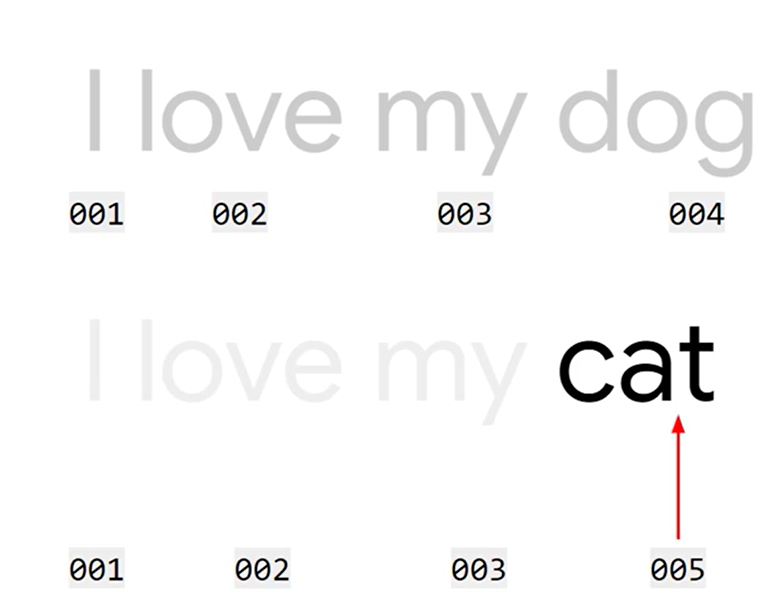

## Kode untuk Mengodekan Kalimat dengan TensorFlow dan Keras

Berikut adalah kode untuk mengodekan dua kalimat yang baru saja kita bahas. Mari kita jelaskan satu per satu.

TensorFlow dan Keras menyediakan beberapa cara untuk mengodekan kata, tetapi yang akan kita fokuskan adalah **lapisan vektorisasi teks** (text vectorization layer). Lapisan ini akan menangani sebagian besar proses berat untuk kita, seperti menghasilkan kosakata dan membuat vektor dari kalimat-kalimat tersebut. 

Pertama, kita akan memasukkan kalimat-kalimat tersebut ke dalam sebuah array. Perhatikan bahwa saya sudah **mengkapitalkan** huruf "I" karena itu adalah awal dari kalimat. Setelah itu, kita akan membuat instance dari lapisan vektorisasi teks. Metode `adapt` pada lapisan vektorisasi teks ini akan menerima data dan menghasilkan kosakata dari kata-kata yang ada dalam kalimat-kalimat ini. Kamu bisa melihat hasilnya dengan memanggil metode `get_vocabulary`. Ini akan mengembalikan daftar yang berisi semua kata dalam kosakata, yang bisa kamu periksa dengan mencetaknya, dan kamu bisa melihat hasilnya di sini.

Ingat ketika kita mengatakan bahwa kata "I" dikapitalisasi? Perhatikan bahwa kata tersebut ditampilkan dalam huruf kecil di sini. Di sini, saya menambahkan kalimat lain, yaitu _"you love my dog."_ Tetapi ada sesuatu yang berbeda. Saya menambahkan tanda seru setelah kata "dog". Nah, apakah ini seharusnya diperlakukan sebagai kata yang berbeda dari sekadar "dog"? Tentu saja tidak. Dan ada hal lain yang dilakukan oleh lapisan vektorisasi teks untukmu. Lapisan ini menghapus tanda baca seperti ini. Jadi, hasil dari kode yang kita lihat sebelumnya dengan data korpus baru ini akan tampak seperti berikut. Perhatikan bahwa kita masih hanya memiliki "dog" sebagai kata kunci, dan tanda seru tidak memengaruhinya.

Dan tentu saja, kita memiliki kata kunci baru untuk kata "you" yang terdeteksi.

Jadi, kamu sudah melihat langkah awal dalam menangani teks dengan membuat enkoding berbasis kata dari teks tersebut menggunakan beberapa kode sederhana di TensorFlow dan Keras. Namun, ada satu hal lagi dalam kode di atas yang belum kita bahas. Saat mendapatkan kosakata, kamu mengatur parameter `include_special_tokens` ke _false_. Secara default, nilai ini adalah _true_, jadi kamu bisa melihat apa yang akan terjadi jika menghapusnya dan menjalankan kode lagi. Sekarang, kamu memiliki dua token tambahan dalam kosakata, yaitu **token string kosong** dan **token `unk`**.

Pada video berikutnya, kita akan melihat beberapa kode lagi, dan kamu akan mengerti mengapa kedua token tambahan ini sangat berguna.

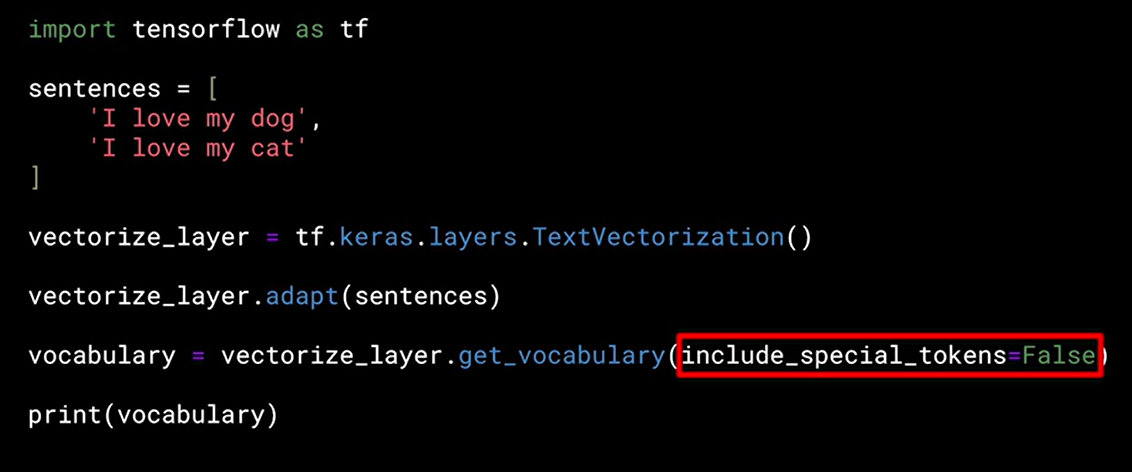

# Padding dalam Natural Language Processing (NLP)

Dalam Natural Language Processing (NLP), **padding** adalah proses menambahkan token kosong (biasanya disebut *padding token*) ke suatu urutan teks agar semua urutan dalam kumpulan data memiliki panjang yang sama. Padding digunakan ketika kita memproses data teks dengan model yang memerlukan input berdimensi tetap, seperti jaringan neural atau model deep learning lainnya.

## Mengapa Padding Dibutuhkan?
1. **Dimensi Input yang Konsisten**: Banyak model deep learning memerlukan input dengan panjang yang sama agar dapat diproses secara bersamaan (batch processing).
2. **Efisiensi Komputasi**: Padding memungkinkan data diproses dalam batch secara efisien, mempercepat proses pelatihan.
3. **Mempertahankan Informasi Relatif**: Padding membantu mempertahankan urutan kata atau kalimat dalam teks.

## Cara Padding Bekerja
Misalkan kita memiliki tiga kalimat dengan panjang yang berbeda:
- "I like NLP" (3 kata)
- "I love learning NLP with examples" (6 kata)
- "NLP is fun" (3 kata)

Jika kita ingin semua kalimat memiliki panjang 6, maka kita bisa menambahkan padding token, misalnya `[PAD]`, pada kalimat yang lebih pendek:

- "I like NLP `[PAD]` `[PAD]` `[PAD]`"
- "I love learning NLP with examples"
- "NLP is fun `[PAD]` `[PAD]` `[PAD]`"

## Jenis Padding
1. **Pre-padding**: Padding ditambahkan di awal kalimat.
2. **Post-padding**: Padding ditambahkan di akhir kalimat (lebih umum).

Padding juga sering digunakan bersama dengan **masking**, di mana model dilatih untuk mengabaikan token padding agar tidak mempengaruhi hasil perhitungan.

## Percobaan dengan Kata-Kata Tidak Dikenal pada Layer Vektorisasi Teks

Mari kita lihat apa yang terjadi saat Anda memasukkan kata-kata yang tidak dikenal ke dalam layer vektorisasi teks. Seperti yang sudah Anda ketahui, layer ini mengkodekan setiap set kalimat berdasarkan kosa kata yang dipelajarinya dari metode `adapt`. Ini sangat penting jika Anda berpikir lebih jauh ke depan. Jika Anda melatih sebuah jaringan saraf pada korpus teks berdasarkan kosa kata ini, maka ketika Anda ingin melakukan *inference* dengan model yang telah dilatih, Anda harus mengkodekan teks yang ingin di-*infer* dengan kosa kata yang sama. Jika tidak, itu akan menjadi tidak berarti karena kata-kata akan dipetakan ke angka yang berbeda.

Sekarang mari kita kembali ke contoh yang sama yang telah sering Anda lihat sebelumnya. Anda memiliki empat kalimat, dan Anda mengadaptasi layer vektorisasi teks ke kalimat-kalimat tersebut. Namun kali ini, Anda memiliki kumpulan kalimat tes yang berbeda yang ingin Anda vektorisasi. Perhatikan kode berikut ini, apa yang Anda harapkan dari outputnya?

Di sini ada beberapa kata yang familiar dalam kalimat, seperti `love`, `my`, dan `dog`, tetapi juga ada beberapa kata yang belum pernah dilihat sebelumnya seperti `really` dan `manatee`. Jika Anda menjalankan kode ini, inilah yang akan Anda dapatkan. Saya telah menambahkan kosa kata atau indeks kata di bawah ini untuk kemudahan.

- Kalimat **"I really love my dog"** akan dikodekan sebagai `6, 1, 3, 2, 4`.  
  Perhatikan bahwa karena Anda tidak memiliki kata `really` dalam kosa kata, itu akan dikodekan sebagai `1`, yang merupakan token kata tidak dikenal (*unknown word token*).

Hal yang sama terjadi pada kalimat kedua, di mana ada dua kata yang tidak dikenal, yaitu `loves` dan `manatee`. Perlu diperhatikan bahwa `love` dan `loves` dianggap sebagai kata yang sepenuhnya berbeda oleh model ini.

Jadi, Anda telah melihat bagaimana cara mengkodekan kalimat Anda, bagaimana cara menambahkan padding, dan bagaimana cara mewakili kata-kata yang tidak dikenal, tetapi Anda telah melakukannya dengan data yang sangat sederhana dan dikodekan secara manual. Sekarang, mari kita lihat kode ini dalam aksi dalam screencast, lalu kita akan kembali dan melihat bagaimana cara menggunakan data yang jauh lebih kompleks.
